In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

In [2]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

# Replace income with appropriate midpoints or custom values
income_mapping = {
    "unknown": 6,              # replacing unknown with the median income level
    "Under $10k": 1,            # midpoint of "Under $10k"
    "10-19,999": 2,            # midpoint of "10-19,999"
    "20-29,999": 3,            # midpoint of "20-29,999"
    "30-39,999": 4,            # midpoint of "30-39,999"
    "40-49,999": 5,            # midpoint of "40-49,999"
    "50-59,999": 6,            # midpoint of "50-59,999"
    "60-69,999": 7,            # midpoint of "60-69,999"
    "70-79,999": 8,            # midpoint of "70-79,999"
    "80-89,999": 9,            # midpoint of "80-89,999"
    "90-99,999": 10,            # midpoint of "90-99,999"
    "100-149,999": 11,         # midpoint of "100-149,999"
    "150 - 174,999": 12,       # midpoint of "150 - 174,999"
    "175 - 199,999": 13,       # midpoint of "175 - 199,999"
    "200 - 249,999": 14,       # midpoint of "200 - 249,999"
    "250k+": 15               # custom value for "250k+"
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_56626/2211222545.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)


In [3]:
display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,73,4,10,1,0,1
1,2,89,1,11,1,1,1
2,3,85,1,2,0,0,1
3,4,76,2,10,1,1,1
4,5,76,2,2,1,0,1


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Prepare features (X) and target (y)
X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

# Add a constant (intercept) to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
log_reg = LogisticRegression(random_state=42, fit_intercept=True)
log_reg.fit(X_train, y_train)

# Print model parameters including intercept
print("Model Intercept:", log_reg.intercept_[0])
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns[1:], log_reg.coef_[0][1:]):  # Skip the constant column
    print(f"{feature}: {coef:.4f}")

# Calculate and print the model accuracy
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

Model Intercept: -4.511437433058428

Feature Coefficients:
age: 0.0481
dist: -0.0163
income: -0.1112
gender: 0.4087
marital_status: 0.4380

Training Accuracy: 0.755
Testing Accuracy: 0.715


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


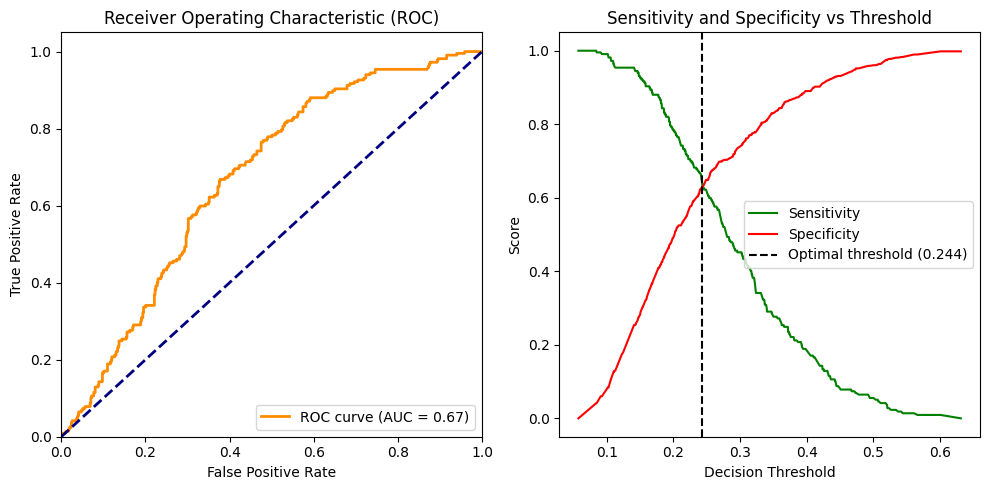

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate sensitivity and specificity for different thresholds
sensitivity = tpr
specificity = 1 - fpr

# Find optimal threshold where sensitivity and specificity are closest
differences = np.abs(sensitivity - specificity)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")

# Plot sensitivity/specificity vs threshold
ax2.plot(thresholds, sensitivity, label='Sensitivity', color='green')
ax2.plot(thresholds, specificity, label='Specificity', color='red')
ax2.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Optimal threshold ({optimal_threshold:.3f})')
ax2.set_xlabel('Decision Threshold')
ax2.set_ylabel('Score')
ax2.set_title('Sensitivity and Specificity vs Threshold')
ax2.legend()

plt.tight_layout()
plt.show()

Optimal threshold: 0.244
At this threshold:
Sensitivity: 0.631
Specificity: 0.630


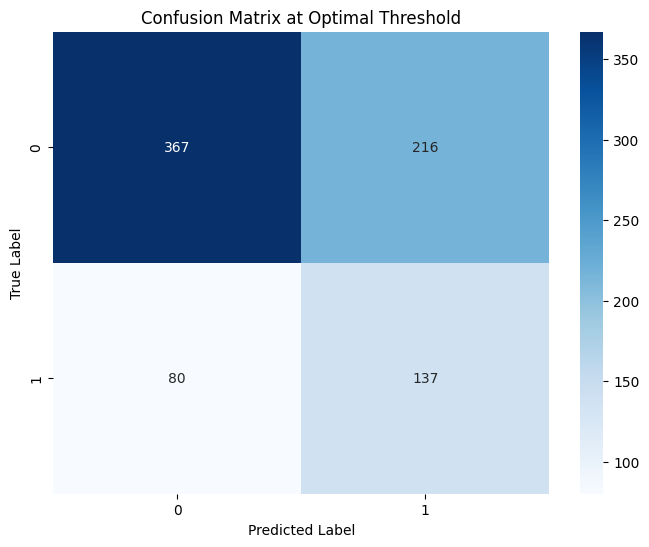

In [6]:
# Find optimal threshold where sensitivity and specificity are closest
differences = np.abs(sensitivity - specificity)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At this threshold:")
print(f"Sensitivity: {sensitivity[optimal_idx]:.3f}")
print(f"Specificity: {specificity[optimal_idx]:.3f}")

# Get predictions using optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix at Optimal Threshold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# 63% at optimal threshold

Lift Chart for Logistic Regression Model:

Logistic Regression Lift Chart Data:


,Lift Curve,Baseline,Lift
0,0.0,0.0,0.0
1,15.6,10.0,5.6
2,31.4,20.0,11.4
3,46.5,30.0,16.5
4,61.3,40.0,21.3
5,72.1,50.0,22.1
6,78.9,60.0,18.9
7,85.8,70.0,15.8
8,92.0,80.0,12.0
9,97.2,90.0,7.2


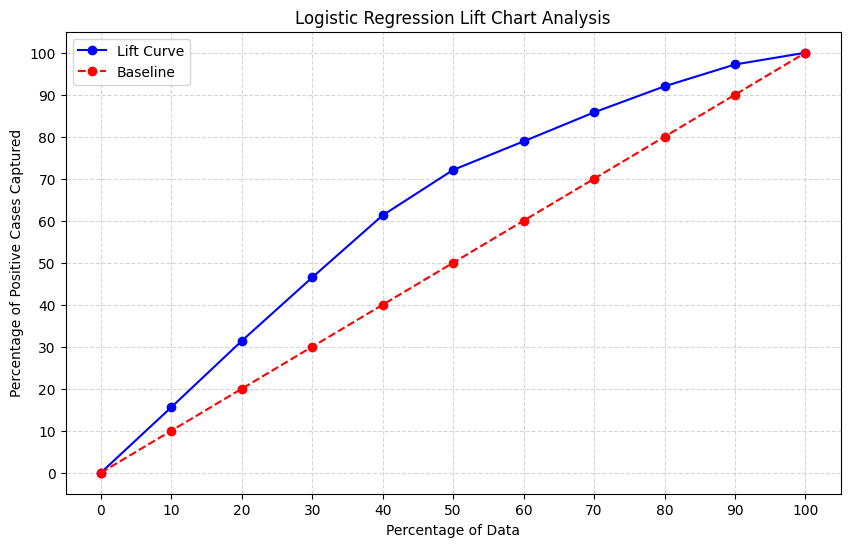

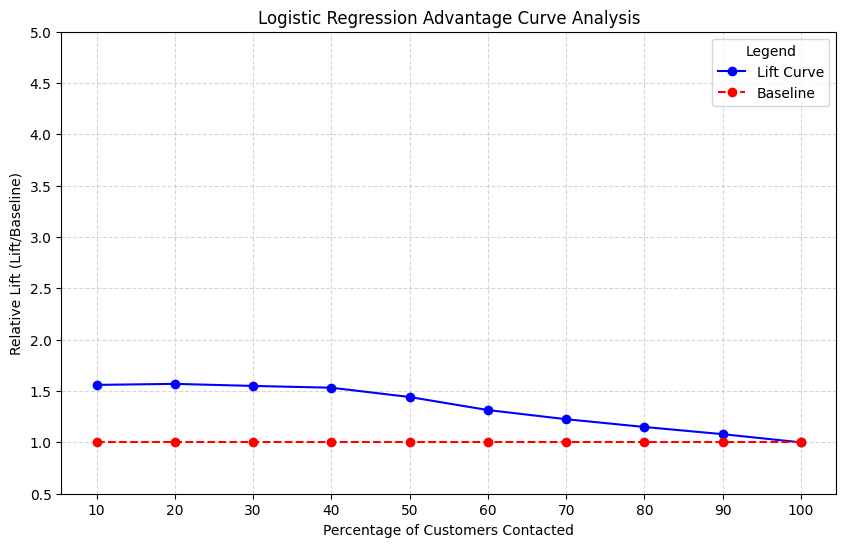


Top rows of sorted data (by predicted probabilities):


,id,age,dist,income,gender,marital_status,target,predicted_probs
3917,3918,94,1,2,1,1,0,0.655432
2393,2394,94,2,2,1,1,1,0.651772
442,443,94,3,2,1,1,1,0.648094
2151,2152,94,0,3,1,1,0,0.633796
460,461,92,1,2,1,1,1,0.633055



Top rows of shuffled data (random order):


,id,age,dist,income,gender,marital_status,target,predicted_probs
0,556,77,5,11,0,0,0,0.109804
1,3492,82,3,11,1,1,1,0.274687
2,528,80,3,11,0,1,0,0.184691
3,3926,73,1,3,1,0,0,0.284534
4,2990,69,5,2,1,1,0,0.344707


In [7]:
# Train Logistic Regression model and get predictions for lift chart
predictors = ['age', 'income', 'dist', 'gender', 'marital_status']
target = 'target'

# Split data into training and test sets
X = data[predictors]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict probabilities for the entire dataset
data['predicted_probs'] = lr_model.predict_proba(X)[:, 1]

# Sort and shuffle data
data_sorted_lr = data.sort_values(by='predicted_probs', ascending=False)
data_shuffled_lr = data.sample(frac=1, random_state=42).reset_index(drop=True)

def lift_chart(sorted_data, shuffled_data):
    """
    Computes and plots the lift chart comparing sorted vs shuffled data
    
    Parameters:
    - sorted_data: DataFrame sorted by predicted probabilities
    - shuffled_data: DataFrame in random order
    """
    # Calculate cumulative positives at each decile
    total_positives = sorted_data['target'].sum()
    n_rows = len(sorted_data)
    
    lift_curve = []
    baseline_curve = []
    
    for i in range(11):
        cutoff = int((i/10) * n_rows)
        
        # Lift curve from sorted data
        lift_percentage = sorted_data.iloc[:cutoff]['target'].sum() / total_positives * 100
        lift_curve.append(lift_percentage)
        
        # Baseline from shuffled data 
        baseline_percentage = (i/10) * 100
        baseline_curve.append(baseline_percentage)
    
    # Create results DataFrame
    lift_data = pd.DataFrame({
        'Lift Curve': lift_curve,
        'Baseline': baseline_curve
    })
    lift_data['Lift'] = lift_data['Lift Curve'] - lift_data['Baseline']
    
    print("\nLogistic Regression Lift Chart Data:")
    display(lift_data)
    
    # Plot lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 100, 11), lift_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(0, 100, 11), lift_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Logistic Regression Lift Chart Analysis')
    plt.xlabel('Percentage of Data')
    plt.ylabel('Percentage of Positive Cases Captured')
    plt.xticks(np.linspace(0, 100, 11))
    plt.yticks(np.linspace(0, 100, 11))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # Calculate and plot advantage curve
    advantage_data = lift_data.copy()
    advantage_data['Lift Curve'] = advantage_data['Lift Curve'] / advantage_data['Baseline']
    advantage_data['Baseline'] = advantage_data['Baseline'] / advantage_data['Baseline']
    advantage_data = advantage_data.iloc[1:] # Remove first row to avoid division by zero
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(10, 100, 10), advantage_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(10, 100, 10), advantage_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Logistic Regression Advantage Curve Analysis')
    plt.xlabel('Percentage of Customers Contacted')
    plt.ylabel('Relative Lift (Lift/Baseline)')
    plt.xticks(np.linspace(10, 100, 10))
    plt.ylim(0.5, 5)
    plt.legend(title='Legend')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    return lift_data

# Generate lift chart
print("Lift Chart for Logistic Regression Model:")
lift_data_lr = lift_chart(data_sorted_lr, data_shuffled_lr)

print("\nTop rows of sorted data (by predicted probabilities):")
display(data_sorted_lr.head())

print("\nTop rows of shuffled data (random order):")
display(data_shuffled_lr.head())


RANDOM FOREST MODEL

Lift Chart for Random Forest Model:

Random Forest Lift Chart Data:


,Lift Curve,Baseline,Lift
0,0.0,0.0,0.0
1,37.7,10.0,27.7
2,72.8,20.0,52.8
3,88.6,30.0,58.6
4,91.9,40.0,51.9
5,95.2,50.0,45.2
6,96.6,60.0,36.6
7,98.0,70.0,28.0
8,99.1,80.0,19.1
9,99.4,90.0,9.4


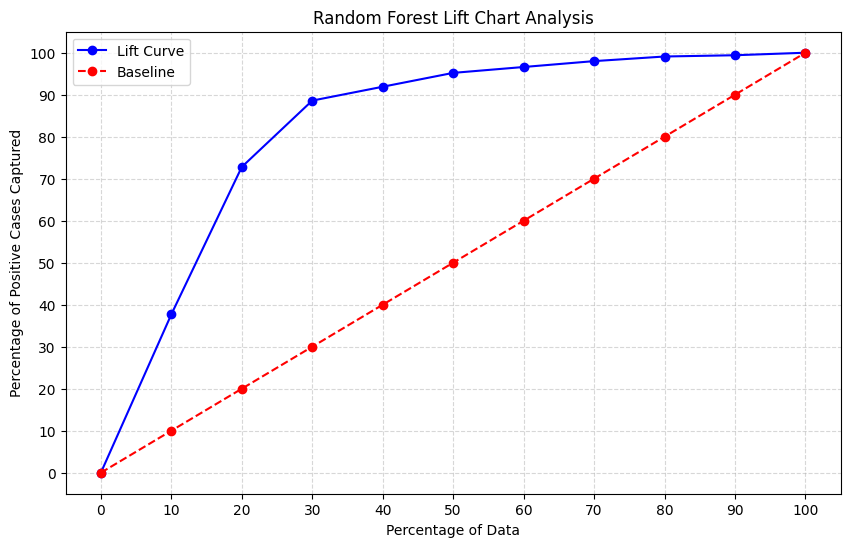

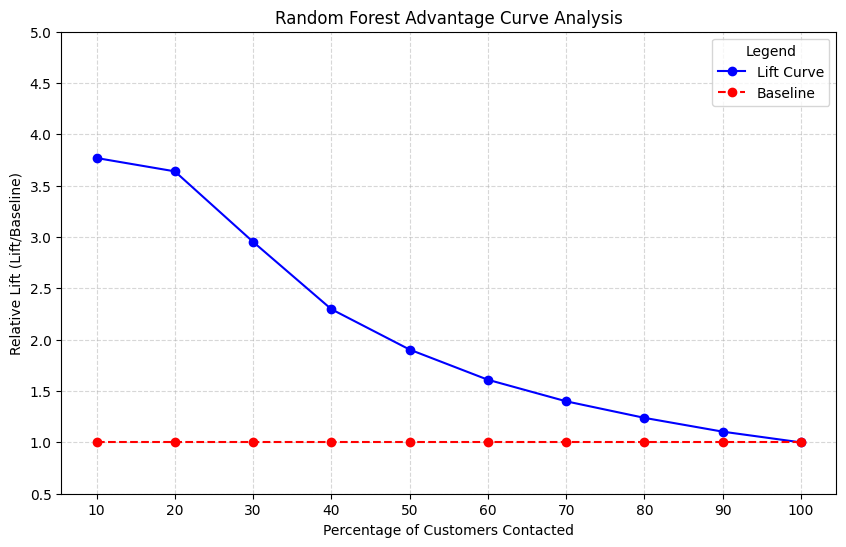


Top rows of sorted data (by predicted probabilities):


,id,age,dist,income,gender,marital_status,target,predicted_probs
2726,2727,79,0,2,0,1,1,0.99
2071,2072,79,0,2,0,1,1,0.99
1016,1017,77,5,11,1,1,1,0.98
246,247,85,0,6,1,1,1,0.98
171,172,77,5,11,1,1,1,0.98



Top rows of shuffled data (random order):


,id,age,dist,income,gender,marital_status,target,predicted_probs
0,556,77,5,11,0,0,0,0.050
1,3492,82,3,11,1,1,1,0.080
2,528,80,3,11,0,1,0,0.250
3,3926,73,1,3,1,0,0,0.205
4,2990,69,5,2,1,1,0,0.285


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Train Random Forest model and get predictions for lift chart
predictors = ['age', 'income', 'dist', 'gender', 'marital_status']
target = 'target'

# Split data into training and test sets
X = data[predictors]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the entire dataset
data['predicted_probs'] = rf_model.predict_proba(X)[:, 1]

# Sort and shuffle data
data_sorted_rf = data.sort_values(by='predicted_probs', ascending=False)
data_shuffled_rf = data.sample(frac=1, random_state=42).reset_index(drop=True)

def lift_chart(sorted_data, shuffled_data):
    """
    Computes and plots the lift chart comparing sorted vs shuffled data
    
    Parameters:
    - sorted_data: DataFrame sorted by predicted probabilities
    - shuffled_data: DataFrame in random order
    """
    # Calculate cumulative positives at each decile
    total_positives = sorted_data['target'].sum()
    n_rows = len(sorted_data)
    
    lift_curve = []
    baseline_curve = []
    
    for i in range(11):
        cutoff = int((i/10) * n_rows)
        
        # Lift curve from sorted data
        lift_percentage = sorted_data.iloc[:cutoff]['target'].sum() / total_positives * 100
        lift_curve.append(lift_percentage)
        
        # Baseline from shuffled data 
        baseline_percentage = (i/10) * 100
        baseline_curve.append(baseline_percentage)
    
    # Create results DataFrame
    lift_data = pd.DataFrame({
        'Lift Curve': lift_curve,
        'Baseline': baseline_curve
    })
    lift_data['Lift'] = lift_data['Lift Curve'] - lift_data['Baseline']
    
    print("\nRandom Forest Lift Chart Data:")
    display(lift_data)
    
    # Plot lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 100, 11), lift_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(0, 100, 11), lift_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Random Forest Lift Chart Analysis')
    plt.xlabel('Percentage of Data')
    plt.ylabel('Percentage of Positive Cases Captured')
    plt.xticks(np.linspace(0, 100, 11))
    plt.yticks(np.linspace(0, 100, 11))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # Calculate and plot advantage curve
    advantage_data = lift_data.copy()
    advantage_data['Lift Curve'] = advantage_data['Lift Curve'] / advantage_data['Baseline']
    advantage_data['Baseline'] = advantage_data['Baseline'] / advantage_data['Baseline']
    advantage_data = advantage_data.iloc[1:] # Remove first row to avoid division by zero
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(10, 100, 10), advantage_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(10, 100, 10), advantage_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Random Forest Advantage Curve Analysis')
    plt.xlabel('Percentage of Customers Contacted')
    plt.ylabel('Relative Lift (Lift/Baseline)')
    plt.xticks(np.linspace(10, 100, 10))
    plt.ylim(0.5, 5)
    plt.legend(title='Legend')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    return lift_data

# Generate lift chart
print("Lift Chart for Random Forest Model:")
lift_data_rf = lift_chart(data_sorted_rf, data_shuffled_rf)

print("\nTop rows of sorted data (by predicted probabilities):")
display(data_sorted_rf.head())

print("\nTop rows of shuffled data (random order):")
display(data_shuffled_rf.head())


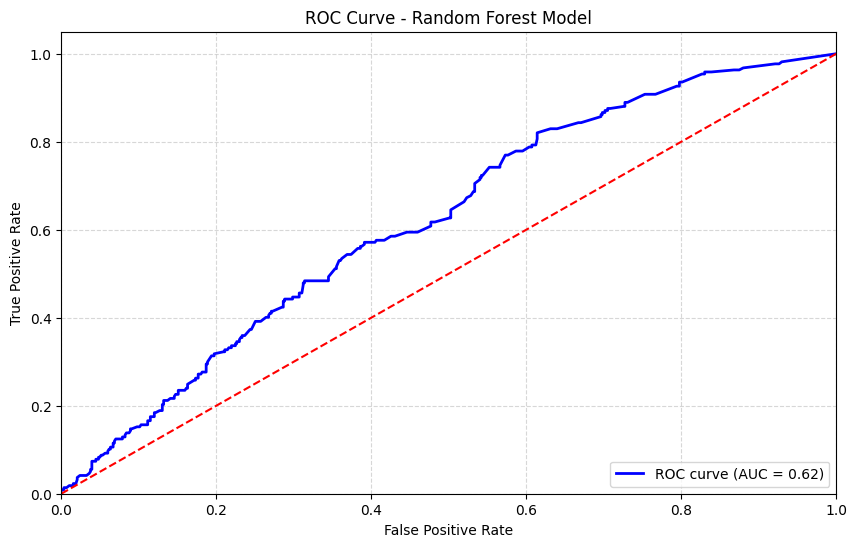

In [9]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


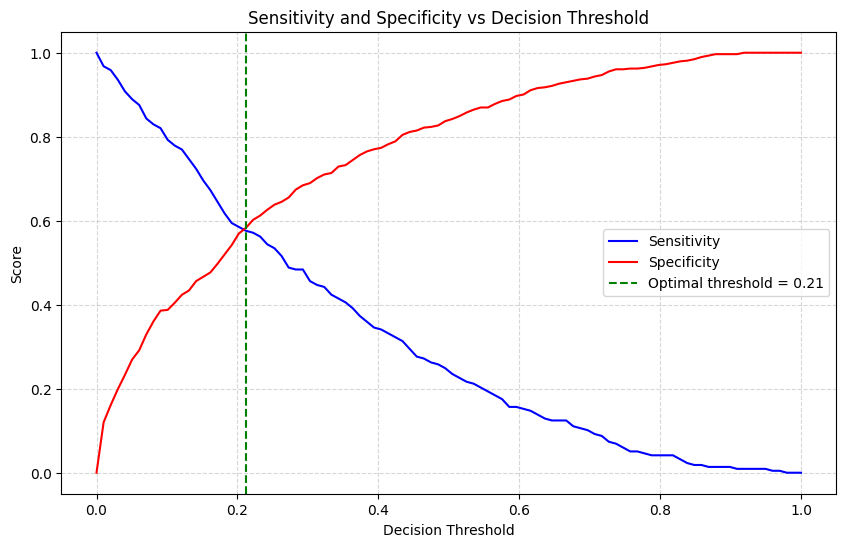

In [10]:
# Calculate sensitivity and specificity for different thresholds
thresholds = np.linspace(0, 1, 100)
sensitivity = []
specificity = []

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # True Positive Rate (Sensitivity)
    tp = np.sum((y_test == 1) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))
    sensitivity.append(tp / (tp + fn))
    
    # True Negative Rate (Specificity) 
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    specificity.append(tn / (tn + fp))

# Find threshold where sensitivity and specificity are closest
differences = np.abs(np.array(sensitivity) - np.array(specificity))
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

# Plot sensitivity and specificity vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivity, label='Sensitivity', color='blue')
plt.plot(thresholds, specificity, label='Specificity', color='red')
plt.axvline(x=optimal_threshold, color='green', linestyle='--', 
           label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Sensitivity and Specificity vs Decision Threshold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


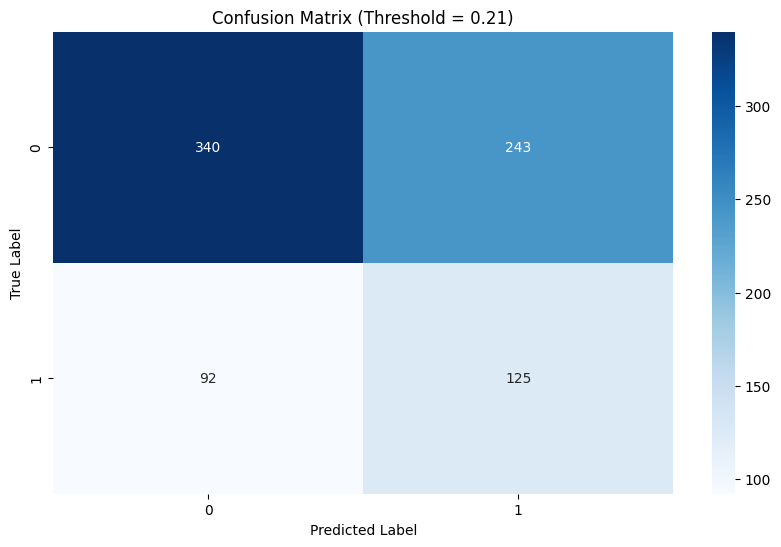

In [11]:
# Generate predictions using optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Create and plot confusion matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {optimal_threshold:.2f})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# 57% at optimal threshold

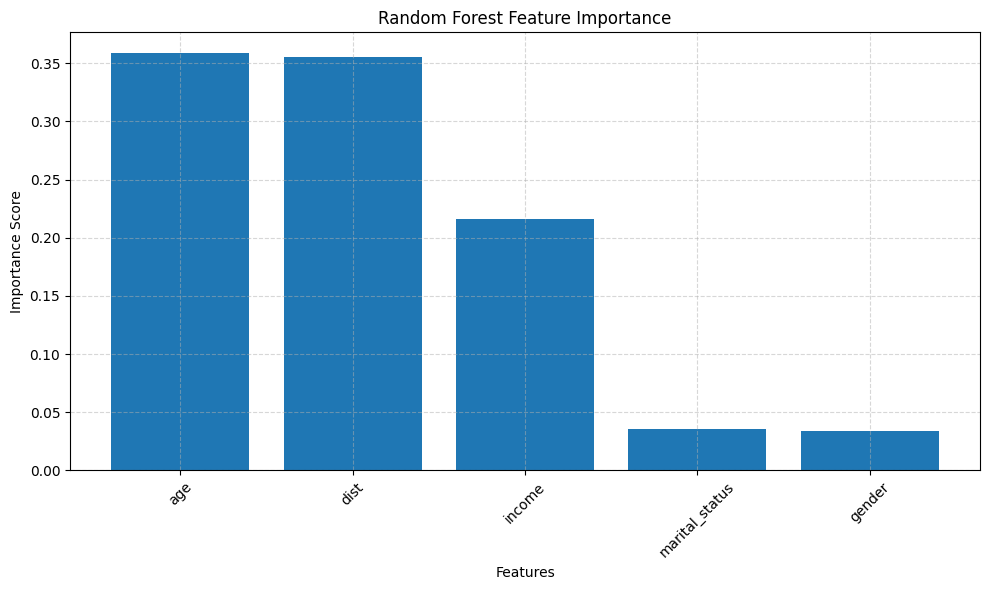


Pattern Analysis in Top 10% Predictions vs Overall:


,Feature,Top 10% Mean,Overall Mean,Difference
0,age,81.5200,76.58850,4.93150
3,gender,0.6050,0.49325,0.11175
4,marital_status,0.7550,0.66925,0.08575
2,dist,7.0100,7.91500,-0.90500
1,income,5.1375,6.97875,-1.84125


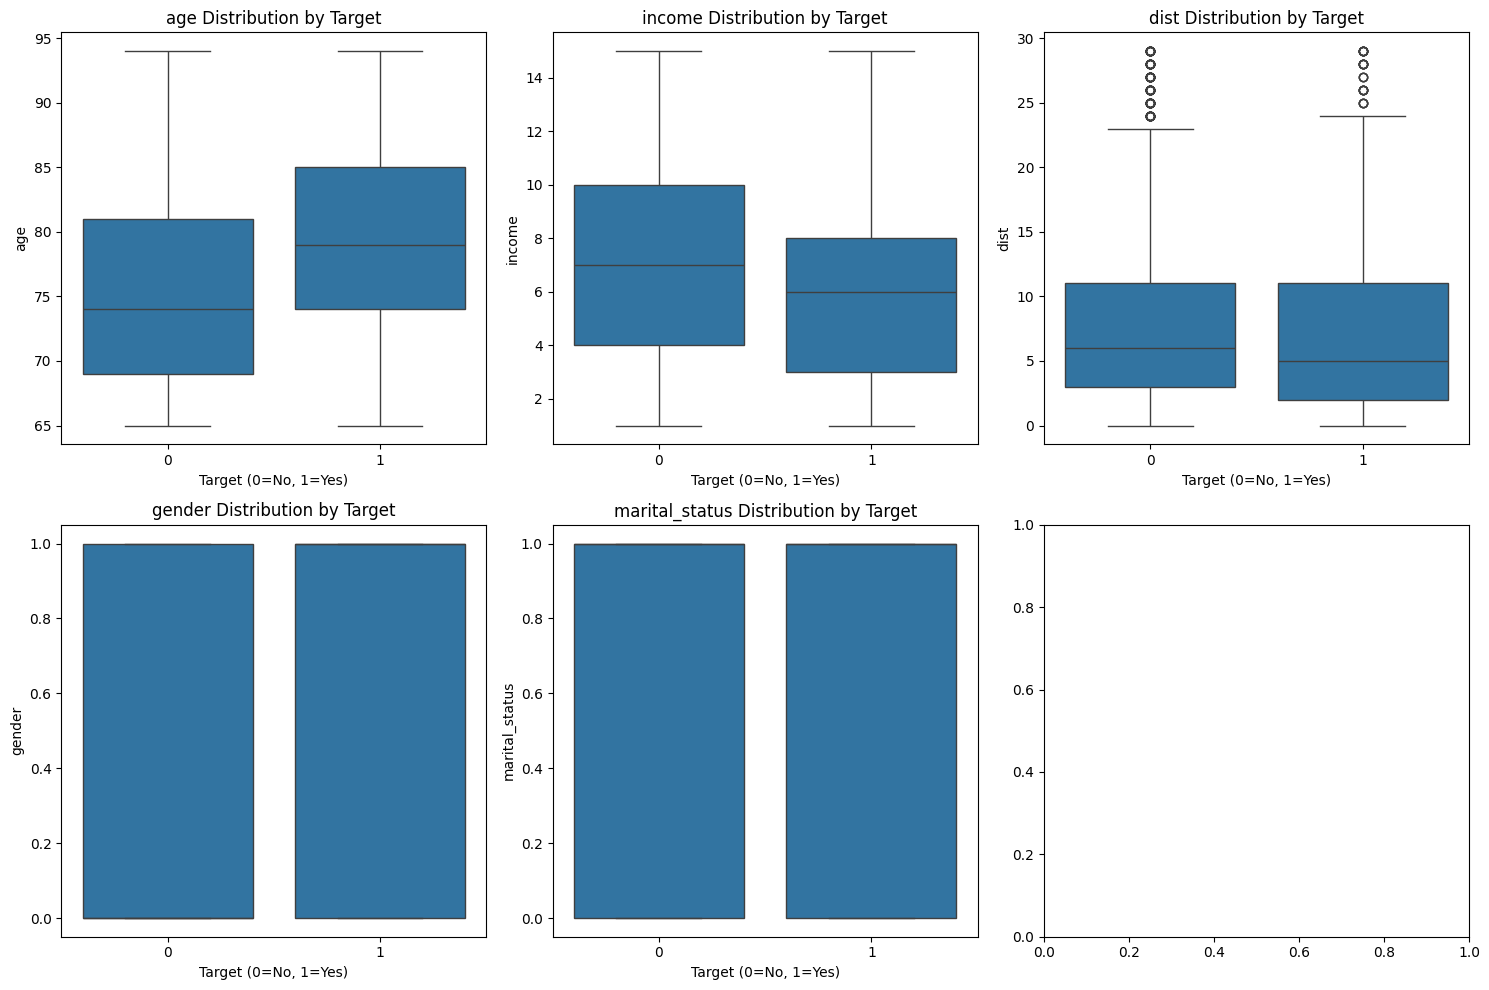

In [12]:
# Analyze feature importance and patterns for positive outcomes
rf_feature_importance = pd.DataFrame({
    'Feature': predictors,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Analyze patterns in top performing predictions
top_predictions = data_sorted_rf.head(int(len(data_sorted_rf) * 0.1))  # Top 10% of predictions

# Calculate mean values for each feature in top predictions vs overall
pattern_analysis = pd.DataFrame({
    'Feature': predictors,
    'Top 10% Mean': [top_predictions[feat].mean() for feat in predictors],
    'Overall Mean': [data[feat].mean() for feat in predictors]
})

# Calculate the difference to highlight strongest patterns
pattern_analysis['Difference'] = pattern_analysis['Top 10% Mean'] - pattern_analysis['Overall Mean']
pattern_analysis = pattern_analysis.sort_values('Difference', ascending=False)

print("\nPattern Analysis in Top 10% Predictions vs Overall:")
display(pattern_analysis)

# Visualize distributions of features for positive vs negative outcomes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(predictors):
    if idx < len(axes):
        sns.boxplot(data=data, x='target', y=feature, ax=axes[idx])
        axes[idx].set_title(f'{feature} Distribution by Target')
        axes[idx].set_xlabel('Target (0=No, 1=Yes)')

plt.tight_layout()
plt.show()
